In [1]:
import pandas as pd

In [14]:
#The starting point is this dataframe found on the harddrive of ShuZe Wang, who started the project
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
df_original = pd.read_csv('/localhome/cschiebroek/ShuZe/vp/data cleaning/cleaned_vp_all.tsv', sep='\t')
print("Original amount of datapoints: ", len(df_original))
print(df_original['Temperature'].value_counts())   
df_original_298 = df_original[df_original['Temperature'] == 298.15] 
print("Amount of datapoints with temperature 298.15K: ", len(df_original_298))
df_original_298['standardized_smiles'] = df_original_298.apply(lambda row: Chem.MolToSmiles(rdMolStandardize.ChargeParent(Chem.MolFromSmiles((row['SMILES'])))), axis=1)
df_original_298['inchikey'] = df_original_298.apply(lambda row: Chem.MolToInchiKey(Chem.MolFromSmiles((row['standardized_smiles']))), axis=1)
df_original_298
#save in tmp_data as df_original_shuze_standardized_298.csv
df_original_298 = df_original_298.rename(columns={'Vapour Pressure (log10 kPa)':'VP_logPA_shuze'})
df_original_298['VP_logPA_shuze'] = df_original_298['VP_logPA_shuze'] + 3
df_original_298.to_csv('../tmp_data/df_original_shuze_standardized_298.csv', index=False)

Original amount of datapoints:  4436
Temperature
298.15    3098
293.15    1338
Name: count, dtype: int64
Amount of datapoints with temperature 298.15K:  3098


[12:36:47] Initializing MetalDisconnector
[12:36:47] Running MetalDisconnector
[12:36:47] Initializing Normalizer
[12:36:47] Running Normalizer
[12:36:47] Running LargestFragmentChooser
[12:36:47] Fragment: CCCCCCCCCCCCCCCCCC(=O)OCC(O)[C@H]1OC[C@@H](O)[C@@H]1O
[12:36:47] New largest fragment: CCCCCCCCCCCCCCCCCC(=O)OCC(O)[C@H]1OC[C@@H](O)[C@@H]1O (76)
[12:36:47] Running Uncharger
[12:36:47] Initializing MetalDisconnector
[12:36:47] Running MetalDisconnector
[12:36:47] Initializing Normalizer
[12:36:47] Running Normalizer
[12:36:47] Initializing MetalDisconnector
[12:36:47] Running MetalDisconnector
[12:36:47] Initializing Normalizer
[12:36:47] Running Normalizer
[12:36:47] Running LargestFragmentChooser
[12:36:47] Fragment: CC=CCCCCCC
[12:36:47] New largest fragment: CC=CCCCCCC (27)
[12:36:47] Running Uncharger
[12:36:47] Initializing MetalDisconnector
[12:36:47] Running MetalDisconnector
[12:36:47] Initializing Normalizer
[12:36:47] Running Normalizer
[12:36:47] Initializing MetalDisco

In [15]:
import numpy as np
opera_train_mols = []
smiles_train = []
vps_train = []
for mol in Chem.SDMolSupplier('/localhome/cschiebroek/MDFPs/mdfptools/carl/data_curation/OPERA_Data/TR_VP_2034.sdf'):
    opera_train_mols.append(mol)
    smiles_train.append(Chem.MolToSmiles(mol))
    vps_train.append(mol.GetProp('LogVP'))
opera_test_mols = []
smiles_test = []
vps_test = []
for mol in Chem.SDMolSupplier('/localhome/cschiebroek/MDFPs/mdfptools/carl/data_curation/OPERA_Data/TST_VP_679.sdf'):
    opera_test_mols.append(mol)
    smiles_test.append(Chem.MolToSmiles(mol))
    vps_test.append(mol.GetProp('LogVP'))
df_train = pd.DataFrame({'standardized_smiles':smiles_train, 'VP log mmHg':vps_train})
df_test = pd.DataFrame({'standardized_smiles':smiles_test, 'VP log mmHg':vps_test})
df_train['VP mmHg'] = df_train['VP log mmHg'].apply(lambda x: 10**float(x))
df_train['VP Pa'] = df_train['VP mmHg'].apply(lambda x: x*133.322)
df_train['VP logPa'] = df_train['VP Pa'].apply(lambda x: np.log10(x))
df_train = df_train.drop(columns=['VP Pa','VP mmHg'])
df_test['VP mmHg'] = df_test['VP log mmHg'].apply(lambda x: 10**float(x))
df_test['VP Pa'] = df_test['VP mmHg'].apply(lambda x: x*133.322)
df_test['VP logPa'] = df_test['VP Pa'].apply(lambda x: np.log10(x))
df_test = df_test.drop(columns=['VP Pa','VP mmHg'])
#add inchikey
df_train['inchikey'] = df_train.apply(lambda row: Chem.MolToInchiKey(Chem.MolFromSmiles(row['standardized_smiles'])), axis=1)
df_test['inchikey'] = df_test.apply(lambda row: Chem.MolToInchiKey(Chem.MolFromSmiles(row['standardized_smiles'])), axis=1)

In [ ]:
import numpy as np
opera_train_mols = []
smiles_train = []
vps_train = []
for mol in Chem.SDMolSupplier('/localhome/cschiebroek/MDFPs/mdfptools/carl/data_curation/OPERA_Data/TR_VP_2034.sdf'):
    opera_train_mols.append(mol)
    smiles_train.append(Chem.MolToSmiles(mol))
    vps_train.append(mol.GetProp('LogVP'))
opera_test_mols = []
smiles_test = []
vps_test = []
for mol in Chem.SDMolSupplier('/localhome/cschiebroek/MDFPs/mdfptools/carl/data_curation/OPERA_Data/TST_VP_679.sdf'):
    opera_test_mols.append(mol)
    smiles_test.append(Chem.MolToSmiles(mol))
    vps_test.append(mol.GetProp('LogVP'))
    
df_train = pd.DataFrame({'standardized_smiles':smiles_train, 'VP log mmHg':vps_train})
df_test = pd.DataFrame({'standardized_smiles':smiles_test, 'VP log mmHg':vps_test})
df_train['VP mmHg'] = df_train['VP log mmHg'].apply(lambda x: 10**float(x))
df_train['VP Pa'] = df_train['VP mmHg'].apply(lambda x: x*133.322)
df_train['VP logPa'] = df_train['VP Pa'].apply(lambda x: np.log10(x))
df_train = df_train.drop(columns=['VP Pa','VP mmHg'])
df_test['VP mmHg'] = df_test['VP log mmHg'].apply(lambda x: 10**float(x))
df_test['VP Pa'] = df_test['VP mmHg'].apply(lambda x: x*133.322)
df_test['VP logPa'] = df_test['VP Pa'].apply(lambda x: np.log10(x))
df_test = df_test.drop(columns=['VP Pa','VP mmHg'])
#add inchikey
df_train['inchikey'] = df_train.apply(lambda row: Chem.MolToInchiKey(Chem.MolFromSmiles(row['standardized_smiles'])), axis=1)
df_test['inchikey'] = df_test.apply(lambda row: Chem.MolToInchiKey(Chem.MolFromSmiles(row['standardized_smiles'])), axis=1)

In [22]:
import numpy as np
opera_all_mols = []
smiles_all = []
vps_all = []
opera_mols_25,opera_smiles_25,opera_vps_25 = [],[],[]
#/localhome/cschiebroek/MDFPs/mdfptools/carl/data_curation/OPERA_Data/VP_QR.sdf
for mol in Chem.SDMolSupplier('/localhome/cschiebroek/MDFPs/mdfptools/carl/data_curation/OPERA_Data/VP_QR.sdf'):
    opera_all_mols.append(mol)
    smiles_all.append(Chem.MolToSmiles(mol))
    vps_all.append(mol.GetProp('LogVP'))
    if mol.GetProp('VP Temperature') == '25':
        opera_mols_25.append(mol)
        opera_smiles_25.append(Chem.MolToSmiles(mol))
        opera_vps_25.append(mol.GetProp('LogVP'))
#make two dfs
df_all = pd.DataFrame({'SMILES':smiles_all, 'VP log mmHg':vps_all})
df_all['VP mmHg'] = df_all['VP log mmHg'].apply(lambda x: 10**float(x))
df_all['VP Pa'] = df_all['VP mmHg'].apply(lambda x: x*133.322)
df_all['VP logPa'] = df_all['VP Pa'].apply(lambda x: np.log10(x))
df_all = df_all.drop(columns=['VP Pa','VP mmHg'])
df_25 = pd.DataFrame({'SMILES':opera_smiles_25, 'VP log mmHg':opera_vps_25})
df_25['VP mmHg'] = df_25['VP log mmHg'].apply(lambda x: 10**float(x))
df_25['VP Pa'] = df_25['VP mmHg'].apply(lambda x: x*133.322)
df_25['VP logPa'] = df_25['VP Pa'].apply(lambda x: np.log10(x))
df_25 = df_25.drop(columns=['VP Pa','VP mmHg'])

#standardize the smiles
df_all['standardized_smiles'] = df_all.apply(lambda row: Chem.MolToSmiles(rdMolStandardize.ChargeParent(Chem.MolFromSmiles((row['SMILES'])))), axis=1)
df_25['standardized_smiles'] = df_25.apply(lambda row: Chem.MolToSmiles(rdMolStandardize.ChargeParent(Chem.MolFromSmiles((row['SMILES'])))), axis=1)

#inchi
df_all['inchikey'] = df_all.apply(lambda row: Chem.MolToInchiKey(Chem.MolFromSmiles(row['standardized_smiles'])), axis=1)
df_25['inchikey'] = df_25.apply(lambda row: Chem.MolToInchiKey(Chem.MolFromSmiles(row['standardized_smiles'])), axis=1)

#save
df_all.to_csv('../tmp_data/df_all_opera_standardized.csv', index=False)
df_25.to_csv('../tmp_data/df_25_opera_standardized.csv', index=False)




[13:10:28] Initializing MetalDisconnector
[13:10:28] Running MetalDisconnector
[13:10:28] Initializing Normalizer
[13:10:28] Running Normalizer
[13:10:28] Running LargestFragmentChooser
[13:10:28] Fragment: CC(O)C(=O)O
[13:10:28] New largest fragment: CC(O)C(=O)O (12)
[13:10:28] Running Uncharger
[13:10:28] Initializing MetalDisconnector
[13:10:28] Running MetalDisconnector
[13:10:28] Initializing Normalizer
[13:10:28] Running Normalizer
[13:10:28] Initializing MetalDisconnector
[13:10:28] Running MetalDisconnector
[13:10:28] Initializing Normalizer
[13:10:28] Running Normalizer
[13:10:28] Running LargestFragmentChooser
[13:10:28] Fragment: Clc1ccc(C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl)cc1
[13:10:28] New largest fragment: Clc1ccc(C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl)cc1 (28)
[13:10:28] Running Uncharger
[13:10:28] Initializing MetalDisconnector
[13:10:28] Running MetalDisconnector
[13:10:28] Initializing Normalizer
[13:10:28] Running Normalizer
[13:10:28] Initializing MetalDisconnector
[13:10:28] Running M

In [16]:
#save df_train, df_test and a combined one
df_train.to_csv('../tmp_data/OPERA_train.csv', index=False)
df_test.to_csv('../tmp_data/OPERA_test.csv', index=False)
df_combined = pd.concat([df_train, df_test])
df_combined.to_csv('../tmp_data/OPERA_combined.csv', index=False)
df_combined

standardized_smiles VP log mmHg  VP logPa  \
0                                          CC(O)C(=O)O     -1.0899  1.035002   
1               Clc1ccc(C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl)cc1     -6.7959 -4.670998   
2                             O=C(O)c1c(Cl)ccc(Cl)c1Cl     -3.2596 -1.134698   
3                     c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34     -8.2604 -6.135498   
4                                 O=C(O)c1cccc(Cl)c1Cl     -3.6421 -1.517198   
..                                                 ...         ...       ...   
674  COc1cc(OC)nc(/N=C(\O)NS(=O)(=O)Nc2ccccc2C(=O)C...     -6.7825 -4.657598   
675                CO/N=C(\C(=O)OC)c1ccccc1COc1ccccc1C     -7.7645 -5.639598   
676        CCOc1cc(C(C)(C)C)ccc1C1COC(c2c(F)cccc2F)=N1     -7.7852 -5.660298   
677           CCN(C(=O)n1nnn(-c2ccccc2Cl)c1=O)C1CCCCC1      -9.426 -7.301098   
678  CC(C)OC(=O)c1cc(-c2nn(C)c(C(F)(F)F)c2Br)c(F)cc1Cl     -7.1506 -5.025698   

                        inchikey  
0    JVTAAEKCZFNVCJ-UHFFFAOYSA-N  
1    YVGGHNCTFXOJCH-UHFFFAOYSA-N  
2    XZIDTOHMJBOSOX-UHFFFAOYSA-N  
3    FMMWHPNWAFZXNH-UHFFFAOYSA-N  
4    QAOJBHRZQQDFHA-UHFFFAOYSA-N  
..                           ...  
674  OFSLKOLYLQSJPB-UHFFFAOYSA-N  
675  ZOTBXTZVPHCKPN-ZPHPHTNESA-N  
676  IXSZQYVWNJNRAL-UHFFFAOYSA-N  
677  LLQPHQFNMLZJMP-UHFFFAOYSA-N  
678  FKLQIONHGSFYJY-UHFFFAOYSA-N  

[2713 rows x 4 columns]

In [17]:
#combine the two dataframes: on inchikey, add VP logPa	from df_combined as VP_logPA_OPERA
df_original_shuze_standardized_298 = pd.read_csv('../tmp_data/df_original_shuze_standardized_298.csv')
df_combined = pd.read_csv('../tmp_data/OPERA_combined.csv')
df_combined = df_combined.rename(columns={'VP logPa':'VP_logPA_OPERA'})
df_combined = df_combined.drop(columns=['standardized_smiles'])
df_combined = df_combined.drop_duplicates(subset=['inchikey'])
df_combined = df_combined.set_index('inchikey')
df_original_shuze_standardized_298 = df_original_shuze_standardized_298.set_index('inchikey')
df_combined = df_combined.join(df_original_shuze_standardized_298, how='inner')
df_combined = df_combined.reset_index()
df_combined

inchikey  VP log mmHg  VP_logPA_OPERA  \
0     AAAQKTZKLRYKHR-UHFFFAOYSA-N      -5.2534       -3.128498   
1     AAEVYOVXGOFMJO-UHFFFAOYSA-N      -5.9066       -3.781698   
2     AAIBYZBZXNWTPP-UHFFFAOYSA-N      -1.4353        0.689602   
3     AAPVQEMYVNZIOO-UHFFFAOYSA-N      -6.5528       -4.427898   
4     AATNZNJRDOVKDD-UHFFFAOYSA-N      -1.1403        0.984602   
...                           ...          ...             ...   
1952  ZYEMGPIYFIJGTP-UHFFFAOYSA-N      -1.9208        0.204102   
1953  ZYGHJZDHTFUPRJ-UHFFFAOYSA-N      -3.0088       -0.883898   
1954  ZYHMJXZULPZUED-UHFFFAOYSA-N      -6.5229       -4.397998   
1955  ZYURHZPYMFLWSH-UHFFFAOYSA-N      -8.7959       -6.670998   
1956  ZYVYEJXMYBUCMN-UHFFFAOYSA-N       2.3243        4.449202   

                             hash_code  \
0     9ccae6b234ab0ca1def487ec7db4d66c   
1     d6e83270099e687044c09b2c37742476   
2     2fc77f9423ca6e54fc7181ec96504dea   
3     084d520aec65b3e1d3e1a9b97ed96594   
4     d1cfd73246e935eb8fd9c6d4c1cc6eff   
...                                ...   
1952  59fdb1600295e4fb8df056a27fe07966   
1953  f7d88049aa259bcbbae3314679b626cb   
1954  adaff504d63ee1394fe08d32eb561d6b   
1955  b46e1aeb463651e92d7fe29ade7b5aa4   
1956  e4e69089ac00551cf9093e6531bac929   

                                                 SMILES  Temperature  \
0     [cH]1:[cH]:[cH]:[c](-[CH](-[c]2:[cH]:[cH]:[cH]...       298.15   
1     [CH3]-[S]-[c]1:[n]:[c](-[NH]-[CH](-[CH3])-[CH3...       298.15   
2     [OH]-[CH]1-[CH2]-[CH2]-[CH2]-[CH2]-[CH]-1-[c]1...       298.15   
3     [O]=[S]1(=[O])-[O]-[CH2]-[CH]2-[CH](-[CH2]-[O]...       298.15   
4     [CH3]-[CH2]-[O]-[P](=[O])(-[CH2]-[CH3])-[O]-[C...       298.15   
...                                                 ...          ...   
1952  [CH2]=[CH]-[CH2]-[c]1:[cH]:[cH]:[c](-[O]-[CH3]...       298.15   
1953  [O]=[c]1:[cH]:[cH]:[c]2:[cH]:[cH]:[cH]:[cH]:[c...       298.15   
1954  [CH]#[C]-[CH2]-[O]-[S](=[O])-[O]-[CH]1-[CH2]-[...       298.15   
1955  [CH3]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2...       298.15   
1956                 [CH3]-[O]-[CH2]-[CH](-[CH3])-[CH3]       298.15   

      VP_logPA_shuze Source                                standardized_smiles  
0          -3.128464  OCHEM                      c1ccc(C(c2ccccc2)c2ccccc2)cc1  
1          -3.781676  OCHEM                         CSc1nc(NC(C)C)nc(NC(C)C)n1  
2           0.689568  OCHEM                                  OC1CCCCC1c1ccccc1  
3          -4.427940  OCHEM  O=S1(=O)OCC2C(CO1)C1(Cl)C(Cl)=C(Cl)C2(Cl)C1(Cl)Cl  
4           0.984640  OCHEM                                    CCOP(=O)(CC)OCC  
...              ...    ...                                                ...  
1952        0.204083  OCHEM                               C=CCc1ccc(OC)c(OC)c1  
1953       -0.883872  OCHEM                                   O=c1ccc2ccccc2o1  
1954       -4.397977  OCHEM             C#CCOS(=O)OC1CCCCC1Oc1ccc(C(C)(C)C)cc1  
1955       -6.670978  OCHEM                       CCCCCCCCCCCCCCCCCCCCCCCCCCCC  
1956        4.449225  OCHEM                                           COCC(C)C  

[1957 rows x 9 columns]

In [28]:
#wait, lets try something. can we match from COSMO-therm to experimental via the df? lets get the DF filtered for experimental values and somehow match (on inchikey?) to the unclean but standardized df
from rdkit.Chem import Descriptors
def getMolDescriptors(mol, missingVal=None):
    ''' calculate the full list of descriptors for a molecule
    
        missingVal is used if the descriptor cannot be calculated
    '''
    res = {}
    for nm,fn in Descriptors._descList:
        # some of the descriptor fucntions can throw errors if they fail, catch those here:
        try:
            val = fn(mol)
        except:
            # print the error message:
            import traceback
            traceback.print_exc()
            # and set the descriptor value to whatever missingVal is
            val = missingVal
        res[nm] = val
    return res
df_reach_cosmotherm_curated = pd.read_csv('/localhome/cschiebroek/MDFPs/mdfptools/carl/data/REACH/df_combined_correct_cosmotherm.csv')
df_reach_standardized_uncurated = pd.read_csv('/localhome/cschiebroek/MDFPs/mdfptools/carl/data_curation/tmp_data/REACH_standardized_not_cleaned.csv')
df_reach_standardized_uncurated = df_reach_standardized_uncurated.rename(columns={'cas':'CAS_RN'})

df_reach_cosmotherm_curated_merged = df_reach_cosmotherm_curated.merge(df_reach_standardized_uncurated, on='CAS_RN')
df_reach_cosmotherm_curated_merged
#here: get descriptors and inchikey and do the crossvalidation
mols = [Chem.MolFromSmiles(smi) for smi in df_reach_cosmotherm_curated_merged['standardized_smiles']]
descriptors = [getMolDescriptors(m) for m in mols]
df_reach_cosmotherm_curated_merged = df_reach_cosmotherm_curated_merged.join(pd.DataFrame(descriptors))
df_reach_cosmotherm_curated_merged['inchikey'] = df_reach_cosmotherm_curated_merged.apply(lambda row: Chem.MolToInchiKey(Chem.MolFromSmiles((row['standardized_smiles']))), axis=1)
df_reach_cosmotherm_curated_merged

Factsheet_ID Substance_ID  \
0            10188  100.035.886   
1            10188  100.035.886   
2            10188  100.035.886   
3            13215  100.048.202   
4            22813  100.100.553   
...            ...          ...   
2723          5767  100.000.794   
2724         15453  100.003.752   
2725         15453  100.003.752   
2726         15215  100.000.789   
2727         15215  100.000.789   

                                         Substance_Name      EC_No  \
0                      1-(3-sulphonatopropyl)pyridinium  239-491-3   
1                      1-(3-sulphonatopropyl)pyridinium  239-491-3   
2                      1-(3-sulphonatopropyl)pyridinium  239-491-3   
3     Ethylenebis(oxyethylene) bis[3-(5-tert-butyl-4...  253-039-2   
4     6'-(dibutylamino)-3'-methyl-2'-(phenylamino)sp...  403-830-5   
...                                                 ...        ...   
2723                                   Trifluoromethane  200-872-4   
2724                                Tetrafluoroethylene  204-126-9   
2725                                Tetrafluoroethylene  204-126-9   
2726                               1,1-difluoroethylene  200-867-7   
2727                               1,1-difluoroethylene  200-867-7   

          CAS_RN              Entry in ECHA DB correct? Substance Type  \
0     15471-17-7                                    yes        organic   
1     15471-17-7                                    yes        organic   
2     15471-17-7                                    yes        organic   
3     36443-68-2                                    yes        organic   
4     89331-94-2  Omitted undefined stereo in OpenBabel        organic   
...          ...                                    ...            ...   
2723     75-46-7                                    yes        organic   
2724    116-14-3                                    yes        organic   
2725    116-14-3                                    yes        organic   
2726     75-38-7                                    yes        organic   
2727     75-38-7                                    yes        organic   

                     Composition Substance_Physical_State Registration_status  \
0     mono-constituent substance                    solid              Active   
1     mono-constituent substance                    solid              Active   
2     mono-constituent substance                    solid              Active   
3     mono-constituent substance                    solid              Active   
4     mono-constituent substance                    solid              Active   
...                          ...                      ...                 ...   
2723  mono-constituent substance                  gaseous              Active   
2724  mono-constituent substance                  gaseous              Active   
2725  mono-constituent substance                  gaseous              Active   
2726  mono-constituent substance                  gaseous              Active   
2727  mono-constituent substance                  gaseous              Active   

      ... fr_sulfonamd fr_sulfone fr_term_acetylene fr_tetrazole  fr_thiazole  \
0     ...            0          0                 0            0            0   
1     ...            0          0                 0            0            0   
2     ...            0          0                 0            0            0   
3     ...            0          0                 0            0            0   
4     ...            0          0                 0            0            0   
...   ...          ...        ...               ...          ...          ...   
2723  ...            0          0                 0            0            0   
2724  ...            0          0                 0            0            0   
2725  ...            0          0                 0            0            0   
2726  ...            0          0                 0            0        

In [32]:
#now on

[13:53:38] Initializing MetalDisconnector
[13:53:38] Running MetalDisconnector
[13:53:38] Initializing Normalizer
[13:53:38] Running Normalizer
[13:53:38] Running LargestFragmentChooser
[13:53:38] Fragment: O=S(=O)([O-])CCC[n+]1ccccc1
[13:53:38] New largest fragment: O=S(=O)([O-])CCC[n+]1ccccc1 (24)
[13:53:38] Running Uncharger
[13:53:38] Initializing MetalDisconnector
[13:53:38] Running MetalDisconnector
[13:53:38] Initializing Normalizer
[13:53:38] Running Normalizer
[13:53:38] Initializing MetalDisconnector
[13:53:38] Running MetalDisconnector
[13:53:38] Initializing Normalizer
[13:53:38] Running Normalizer
[13:53:38] Running LargestFragmentChooser
[13:53:38] Fragment: O=S(=O)([O-])CCC[n+]1ccccc1
[13:53:38] New largest fragment: O=S(=O)([O-])CCC[n+]1ccccc1 (24)
[13:53:38] Running Uncharger
[13:53:38] Initializing MetalDisconnector
[13:53:38] Running MetalDisconnector
[13:53:38] Initializing Normalizer
[13:53:38] Running Normalizer
[13:53:38] Initializing MetalDisconnector
[13:53:38]

In [33]:
df_reach_cosmotherm_curated_merged.to_csv('/localhome/cschiebroek/MDFPs/mdfptools/carl/data/REACH/df_combined_correct_cosmotherm_descriptors.csv', index=False)

In [49]:
df_reach_cosmotherm_curated = pd.read_csv('/localhome/cschiebroek/MDFPs/mdfptools/carl/data/REACH/df_combined_correct_cosmotherm.csv')
df_reach_standardized_uncurated = pd.read_csv('/localhome/cschiebroek/MDFPs/mdfptools/carl/data_curation/tmp_data/REACH_standardized_not_cleaned.csv')
df_reach_standardized_uncurated = df_reach_standardized_uncurated.rename(columns={'cas':'CAS_RN'})
#Temperature_K 298.15
df_reach_standardized_uncurated = df_reach_standardized_uncurated[df_reach_standardized_uncurated['Temperature_K'] == 298.15]
df_reach_cosmotherm_curated_merged = df_reach_cosmotherm_curated.merge(df_reach_standardized_uncurated, on='CAS_RN')
df_reach_cosmotherm_curated_merged
mols = [Chem.MolFromSmiles(smi) for smi in df_reach_cosmotherm_curated_merged['standardized_smiles']]
descriptors = [getMolDescriptors(m) for m in mols]
df_reach_cosmotherm_curated_merged = df_reach_cosmotherm_curated_merged.join(pd.DataFrame(descriptors))
df_reach_cosmotherm_curated_merged['inchikey'] = df_reach_cosmotherm_curated_merged.apply(lambda row: Chem.MolToInchiKey(Chem.MolFromSmiles((row['standardized_smiles']))), axis=1)
df_reach_cosmotherm_curated_merged

Factsheet_ID Substance_ID  \
0            10188  100.035.886   
1            10188  100.035.886   
2            10188  100.035.886   
3            22813  100.100.553   
4            22813  100.100.553   
...            ...          ...   
1420         15279  100.000.764   
1421         15518  100.000.743   
1422         10395  100.000.757   
1423          5767  100.000.794   
1424         15215  100.000.789   

                                         Substance_Name      EC_No  \
0                      1-(3-sulphonatopropyl)pyridinium  239-491-3   
1                      1-(3-sulphonatopropyl)pyridinium  239-491-3   
2                      1-(3-sulphonatopropyl)pyridinium  239-491-3   
3     6'-(dibutylamino)-3'-methyl-2'-(phenylamino)sp...  403-830-5   
4     6'-(dibutylamino)-3'-methyl-2'-(phenylamino)sp...  403-830-5   
...                                                 ...        ...   
1420                                    Difluoromethane  200-839-4   
1421                                          Acetylene  200-816-9   
1422                                     Fluoroethylene  200-832-6   
1423                                   Trifluoromethane  200-872-4   
1424                               1,1-difluoroethylene  200-867-7   

          CAS_RN              Entry in ECHA DB correct? Substance Type  \
0     15471-17-7                                    yes        organic   
1     15471-17-7                                    yes        organic   
2     15471-17-7                                    yes        organic   
3     89331-94-2  Omitted undefined stereo in OpenBabel        organic   
4     89331-94-2  Omitted undefined stereo in OpenBabel        organic   
...          ...                                    ...            ...   
1420     75-10-5                                    yes        organic   
1421     74-86-2                                    yes        organic   
1422     75-02-5                                    yes        organic   
1423     75-46-7                                    yes        organic   
1424     75-38-7                                    yes        organic   

                     Composition Substance_Physical_State Registration_status  \
0     mono-constituent substance                    solid              Active   
1     mono-constituent substance                    solid              Active   
2     mono-constituent substance                    solid              Active   
3     mono-constituent substance                    solid              Active   
4     mono-constituent substance                    solid              Active   
...                          ...                      ...                 ...   
1420  mono-constituent substance                  gaseous              Active   
1421  mono-constituent substance                  gaseous              Active   
1422  mono-constituent substance                  gaseous              Active   
1423  mono-constituent substance                  gaseous              Active   
1424  mono-constituent substance                  gaseous              Active   

     Registration_Type      Tonnage_Band_Displayed Molecular_Formula  \
0                 FULL                ≥ 100 tonnes         C8H11NO3S   
1                 FULL                ≥ 100 tonnes         C8H11NO3S   
2                 FULL                ≥ 100 tonnes         C8H11NO3S   
3                 FULL                  ≥ 0 tonnes        C35H36N2O3   
4                 FULL                  ≥ 0 tonnes        C35H36N2O3   
...                ...                         ...               ...   
1420              FULL  ≥ 10000 to < 100000 tonnes             CH2F2   
1421              FULL  ≥ 10000 to < 100000 tonnes              C2H2   
1422              FULL   Tonnage data confidential             C2H3F   
1423              FULL      ≥ 100 to < 1000 tonnes                 3   
1424              FULL  ≥ 10000 to < 100000 tonnes            C2H2F2   

                 

In [53]:
#get where log10_VP_Pa is not nan
df_reach_cosmotherm_curated_merged = df_reach_cosmotherm_curated_merged[df_reach_cosmotherm_curated_merged['log10_VP_Pa'].notna()]
#print len
print(len(df_reach_cosmotherm_curated_merged))
df_reach_cosmotherm_curated_merged
#get only where Entry in ECHA DB correct?
df_reach_cosmotherm_curated_merged_ = df_reach_cosmotherm_curated_merged[df_reach_cosmotherm_curated_merged['Entry in ECHA DB correct?'] == 'yes']
#print len
print(len(df_reach_cosmotherm_curated_merged_))
df_reach_cosmotherm_curated_merged_
#print len
print(len(df_reach_cosmotherm_curated_merged_))
df_reach_cosmotherm_curated_merged_

1425
1187
1187


Factsheet_ID Substance_ID  \
0            10188  100.035.886   
1            10188  100.035.886   
2            10188  100.035.886   
5             6884  100.110.083   
6            19275  100.100.696   
...            ...          ...   
1420         15279  100.000.764   
1421         15518  100.000.743   
1422         10395  100.000.757   
1423          5767  100.000.794   
1424         15215  100.000.789   

                                         Substance_Name      EC_No  \
0                      1-(3-sulphonatopropyl)pyridinium  239-491-3   
1                      1-(3-sulphonatopropyl)pyridinium  239-491-3   
2                      1-(3-sulphonatopropyl)pyridinium  239-491-3   
5     2-Pyridinecarboxamide, 4-[4-[[[[4-chloro-3-(tr...  608-209-4   
6     Hexanediamide, N1,N1,N6,N6-tetrakis(2-hydroxye...  405-370-0   
...                                                 ...        ...   
1420                                    Difluoromethane  200-839-4   
1421                                          Acetylene  200-816-9   
1422                                     Fluoroethylene  200-832-6   
1423                                   Trifluoromethane  200-872-4   
1424                               1,1-difluoroethylene  200-867-7   

           CAS_RN Entry in ECHA DB correct? Substance Type  \
0      15471-17-7                       yes        organic   
1      15471-17-7                       yes        organic   
2      15471-17-7                       yes        organic   
5     284461-73-0                       yes        organic   
6       6334-25-4                       yes        organic   
...           ...                       ...            ...   
1420      75-10-5                       yes        organic   
1421      74-86-2                       yes        organic   
1422      75-02-5                       yes        organic   
1423      75-46-7                       yes        organic   
1424      75-38-7                       yes        organic   

                     Composition Substance_Physical_State Registration_status  \
0     mono-constituent substance                    solid              Active   
1     mono-constituent substance                    solid              Active   
2     mono-constituent substance                    solid              Active   
5     mono-constituent substance                    solid              Active   
6     mono-constituent substance                    solid              Active   
...                          ...                      ...                 ...   
1420  mono-constituent substance                  gaseous              Active   
1421  mono-constituent substance                  gaseous              Active   
1422  mono-constituent substance                  gaseous              Active   
1423  mono-constituent substance                  gaseous              Active   
1424  mono-constituent substance                  gaseous              Active   

     Registration_Type      Tonnage_Band_Displayed Molecular_Formula  \
0                 FULL                ≥ 100 tonnes         C8H11NO3S   
1                 FULL                ≥ 100 tonnes         C8H11NO3S   
2                 FULL                ≥ 100 tonnes         C8H11NO3S   
5                 FULL        ≥ 10 to < 100 tonnes    C21H16ClF3N4O3   
6                 FULL          ≥ 1 to < 10 tonnes        C14H28N2O6   
...                ...                         ...               ...   
1420              FULL  ≥ 10000 to < 100000 tonnes             CH2F2   
1421              FULL  ≥ 10000 to < 100000 tonnes              C2H2   
1422              FULL   Tonnage data confidential             C2H3F   
1423              FULL      ≥ 100 to < 1000 tonnes                 3   
1424              FULL  ≥ 10000 to < 100000 tonnes            C2H2F2   

                             SMILES according to CAS RN  pV [Pa] 25 °C  \
0                        [O-]S(=O)(=O)CCC[N+]1=CC=CC=C1   9.536300e-16   
1            

In [74]:
for c in df_reach_cosmotherm_curated_merged_.columns:
    print(c)

Factsheet_ID
Substance_ID
Substance_Name
EC_No
CAS_RN
Entry in ECHA DB correct?
Substance Type
Composition
Substance_Physical_State
Registration_status
Registration_Type
Tonnage_Band_Displayed
Molecular_Formula
SMILES according to CAS RN
pV [Pa] 25 °C
log10 KAW 25 °C
SW [mg/l] 25 °C
log10 KOW 25 °C
Tb [°C]
kOH [cm3/s] 25 °C
HO [bar] 25 °C
log10 KOC 25 °C
pV [Pa] 20 °C
log10 KAW 20 °C
SW [mg/l] 20 °C
log10 KOW 20 °C
HO [bar] 20 °C
log10 KOA 20 °C
Different SMILES at pH 7.4
most acidic pKa (below 9.4)
most basic pKa (above 5.4)
Tonnage_Band_Min
Tonnage_Band_Max
Last_updated
#name
iupacName
P (upperQualifier)
P (upperValue)
P (lowerQualifier)
P (lowerValue)
P (unit)
T (upperQualifier)
T (upperValue)
T (lowerQualifier)
T (lowerValue)
T (unit)
VP_Pa
Temperature_K
SMILES
standardized_smiles
log10_VP_Pa
NumHeavyAtoms
MaxAbsEStateIndex
MaxEStateIndex
MinAbsEStateIndex
MinEStateIndex
qed
MolWt
HeavyAtomMolWt
ExactMolWt
NumValenceElectrons
NumRadicalElectrons
MaxPartialCharge
MinPartialCharge
Ma

In [58]:
#new df with only the columns we need: standardized_smiles, log10_VP_Pa, inchikey and RDKIT descriptors
df_reach_curated_compact = df_reach_cosmotherm_curated_merged_[["standardized_smiles", "log10_VP_Pa", "inchikey"] + [x[0] for x in Descriptors._descList]]
df_reach_curated_compact.to_csv('REACH_semi_curated_features_compact_298K.csv', index=False)

In [59]:
#make a similar df for the OPERA data
df_25
#add descriptors
mols = [Chem.MolFromSmiles(smi) for smi in df_25['standardized_smiles']]
descriptors = [getMolDescriptors(m) for m in mols]
df_25 = df_25.join(pd.DataFrame(descriptors))

KeyError: "['log10_VP_Pa'] not in index"

In [63]:
df_opera_curated_compact_298 = df_25.copy()
#rename VP logPa to log10_VP_Pa
df_opera_curated_compact_298 = df_opera_curated_compact_298.rename(columns={'VP logPa':'log10_VP_Pa'})
df_opera_curated_compact_298 = df_opera_curated_compact_298[["standardized_smiles", "log10_VP_Pa", "inchikey"] + [x[0] for x in Descriptors._descList]]
df_opera_curated_compact_298
#save
df_opera_curated_compact_298.to_csv('PHYSPROP_features_compact_298K.csv', index=False)

In [64]:
#load mols and vapor pressures from sdf: /localhome/cschiebroek/MDFPs/mdfptools/carl/data_curation/sandbox/S01. Compounds List for logVP Calculations.sdf
mols,smiles,vps = [],[],[]
for mol in Chem.SDMolSupplier('/localhome/cschiebroek/MDFPs/mdfptools/carl/data_curation/sandbox/S01. Compounds List for logVP Calculations.sdf'):
    if mol:
        mols.append(mol)
        smiles.append(Chem.MolToSmiles(mol))
        vps.append(mol.GetProp('logVP'))
    else:
        print('mol is None')
print(len(mols))
#lets do a test on these using physchem descriptors
descriptors = [getMolDescriptors(m) for m in mols]
df_naef = pd.DataFrame({'SMILES':smiles, 'VP logPa':vps})
#acutally standardize the smiles
df_naef['standardized_smiles'] = df_naef.apply(lambda row: Chem.MolToSmiles(rdMolStandardize.ChargeParent(Chem.MolFromSmiles((row['SMILES'])))), axis=1)
#add descriptros
df_naef = df_naef.join(pd.DataFrame(descriptors))
df_naef['inchikey'] = df_naef.apply(lambda row: Chem.MolToInchiKey(Chem.MolFromSmiles((row['standardized_smiles']))), axis=1)
df_naef



[14:17:24] Explicit valence for atom # 4 C, 6, is greater than permitted
[14:17:24] ERROR: Could not sanitize molecule ending on line 50783
[14:17:24] ERROR: Explicit valence for atom # 4 C, 6, is greater than permitted


mol is None
2071


[14:17:32] Initializing MetalDisconnector
[14:17:32] Running MetalDisconnector
[14:17:32] Initializing Normalizer
[14:17:32] Running Normalizer
[14:17:32] Running LargestFragmentChooser
[14:17:32] Fragment: CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
[14:17:32] New largest fragment: CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC (170)
[14:17:32] Running Uncharger
[14:17:32] Initializing MetalDisconnector
[14:17:32] Running MetalDisconnector
[14:17:32] Initializing Normalizer
[14:17:32] Running Normalizer
[14:17:32] Initializing MetalDisconnector
[14:17:32] Running MetalDisconnector
[14:17:32] Initializing Normalizer
[14:17:32] Running Normalizer
[14:17:32] Running LargestFragmentChooser
[14:17:32] Fragment: CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
[14:17:32] New largest fragment: CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC (164)
[14:17:32] Running Uncharger
[14:17:32] Initializing MetalDisconnector
[14:17:32] Running MetalDisconnector
[14

SMILES VP logPa  \
0     CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...   -19.36   
1     CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...  -18.533   
2     CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...  -17.707   
3     CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...  -16.839   
4      CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC   -15.97   
...                                                 ...      ...   
2066                                                 CF    6.582   
2067                                                C#C    6.591   
2068                                             FC(F)F    6.672   
2069                                                  C     7.79   
2070                                          FC(F)(F)F     7.91   

                                    standardized_smiles  MaxAbsEStateIndex  \
0     CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...           2.313458   
1     CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...           2.313122   
2     CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...           2.312759   
3     CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...           2.312366   
4      CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC           2.311941   
...                                                 ...                ...   
2066                                                 CF           9.500000   
2067                                                C#C           4.000000   
2068                                             FC(F)F           9.666667   
2069                                                  C           0.000000   
2070                                          FC(F)(F)F           9.687500   

      MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex       qed    MolWt  \
0           2.313458           1.374835        1.374835  0.053884  787.528   
1           2.313122           1.374822        1.374822  0.054206  759.474   
2           2.312759           1.374808        1.374808  0.054685  731.420   
3           2.312366           1.374792        1.374792  0.055387  703.366   
4           2.311941           1.374774        1.374774  0.056398  675.312   
...              ...                ...             ...       ...      ...   
2066        9.500000           0.500000        0.500000  0.367329   34.033   
2067        4.000000           4.000000        4.000000  0.332926   26.038   
2068        9.666667           3.666667       -3.666667  0.401096   70.013   
2069        0.000000           0.000000        0.000000  0.359785   16.043   
2070        9.687500           5.500000       -5.500000  0.393167   88.003   

      HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  NumRadicalElectrons  \
0            672.616  786.892054                  338                    0   
1            648.594  758.860754                  326                    0   
2            624.572  730.829453                  314                    0   
3            600.550  702.798153                  302                    0   
4            576.528  674.766853                  290                    0   
...              ...         ...                  ...                  ...   
2066          31.009   34.021878                   14                    0   
2067          24.022   26.015650                   10                    0   
2068          69.005   70.003035                   26                    0   
2069          12.011   16.031300                    8                    0   
2070          88.003   87.993613                   32                    0   

      MaxPartialCharge  MinPartialCharge  MaxAbsPartialCharge  \
0            -0.053306         -0.065382             0.065382   
1            -0.053306         -0.065382             0.065382   
2            -0.053306         -0.065382             0.065382   
3            -0.053306         -0.065382             0.065382   
4            -0.053306         -0.065382             0.065382   
...                ...         

In [66]:
#rename VP logPa to log10_VP_Pa
df_naef = df_naef.rename(columns={'VP logPa':'log10_VP_Pa'})
#keep only the columns we need
df_naef = df_naef[["standardized_smiles", "log10_VP_Pa", "inchikey"] + [x[0] for x in Descriptors._descList]]
df_naef
#save
df_naef.to_csv('NAEF_features_compact_298K.csv', index=False)

In [67]:
#for these three dfs, add column with source, and combine in one df
df_reach_curated_compact['source'] = 'REACH'
df_opera_curated_compact_298['source'] = 'OPERA'
df_naef['source'] = 'NAEF'
df_combined = pd.concat([df_reach_curated_compact, df_opera_curated_compact_298, df_naef])
df_combined

/tmp/ipykernel_3491214/4221107432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reach_curated_compact['source'] = 'REACH'


standardized_smiles log10_VP_Pa  \
0                           O=S(=O)([O-])CCC[n+]1ccccc1   -4.372634   
1                           O=S(=O)([O-])CCC[n+]1ccccc1   -2.617983   
2                           O=S(=O)([O-])CCC[n+]1ccccc1   -4.841638   
5     CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...  -10.387216   
6                      O=C(CCCCC(=O)N(CCO)CCO)N(CCO)CCO   -2.744727   
...                                                 ...         ...   
2066                                                 CF       6.582   
2067                                                C#C       6.591   
2068                                             FC(F)F       6.672   
2069                                                  C        7.79   
2070                                          FC(F)(F)F        7.91   

                         inchikey  MaxAbsEStateIndex  MaxEStateIndex  \
0     REEBJQTUIJTGAL-UHFFFAOYSA-N          10.256643       10.256643   
1     REEBJQTUIJTGAL-UHFFFAOYSA-N          10.256643       10.256643   
2     REEBJQTUIJTGAL-UHFFFAOYSA-N          10.256643       10.256643   
5     MLDQJTXFUGDVEO-UHFFFAOYSA-N          12.938877       12.938877   
6     OKRNLSUTBJUVKA-UHFFFAOYSA-N          11.848883       11.848883   
...                           ...                ...             ...   
2066  NBVXSUQYWXRMNV-UHFFFAOYSA-N           9.500000        9.500000   
2067  HSFWRNGVRCDJHI-UHFFFAOYSA-N           4.000000        4.000000   
2068  XPDWGBQVDMORPB-UHFFFAOYSA-N           9.666667        9.666667   
2069  VNWKTOKETHGBQD-UHFFFAOYSA-N           0.000000        0.000000   
2070  TXEYQDLBPFQVAA-UHFFFAOYSA-N           9.687500        9.687500   

      MinAbsEStateIndex  MinEStateIndex       qed    MolWt  HeavyAtomMolWt  \
0              0.296732       -4.057603  0.504956  201.247         190.159   
1              0.296732       -4.057603  0.504956  201.247         190.159   
2              0.296732       -4.057603  0.504956  201.247         190.159   
5              0.065939       -4.641865  0.461340  464.831         448.703   
6              0.151284       -0.154517  0.296309  320.386         292.162   
...                 ...             ...       ...      ...             ...   
2066           0.500000        0.500000  0.367329   34.033          31.009   
2067           4.000000        4.000000  0.332926   26.038          24.022   
2068           3.666667       -3.666667  0.401096   70.013          69.005   
2069           0.000000        0.000000  0.359785   16.043          12.011   
2070           5.500000       -5.500000  0.393167   88.003          88.003   

      ExactMolWt  NumValenceElectrons  NumRadicalElectrons  MaxPartialCharge  \
0     201.045964                   72                    0          0.168270   
1     201.045964                   72                    0          0.168270   
2     201.045964                   72                    0          0.168270   
5     464.086303                  166                    0          0.417418   
6     320.194737                  130                    0          0.222224   
...          ...                  ...                  ...               ...   
2066   34.021878                   14                    0          0.078508   
2067   26.015650                   10                    0         -0.123544   
2068   70.003035                   26                    0          0.378625   
2069   16.031300                    8                    0         -0.077558   
2070   87.993613                   32                    0          0.559436   

      MinPartialCharge  MaxAbsPartialCharge  MinAbsPartialCharge  \
0            -0.747941             0.747941             0.168270   
1            -0.747941             0.747941             0.168270   
2            -0.747941             0.747941             0.168270   
5            -0.457237             0.457237             0.417418   
6            -0.394534             0.394534             0.222224   
...         

In [69]:
df_combined_unique = df_combined.drop_duplicates(subset=['inchikey'])
print(len(df_combined_unique))

3795


In [84]:
df_reach_cosmo = pd.read_csv('/localhome/cschiebroek/MDFPs/mdfptools/carl/data/REACH/df_combined_correct_cosmotherm.csv')
df_reach_cosmo['pV [Pa] 25 °C'] = df_reach_cosmo['pV [Pa] 25 °C'].apply(lambda x: float(x))
df_reach_cosmo
#make column with log10_VP_Pa
df_reach_cosmo['log10_VP_Pa'] = df_reach_cosmo['pV [Pa] 25 °C'].apply(lambda x: np.log10(x))

/tmp/ipykernel_3491214/466341926.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reach_curated_compact['log10_VP_Pa'] = df_reach_curated_compact['log10_VP_Pa'].apply(lambda x: float(x))
/localhome/cschiebroek/.conda/envs/mdfp_carl/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/cschiebroek/.conda/envs/mdfp_carl/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.us

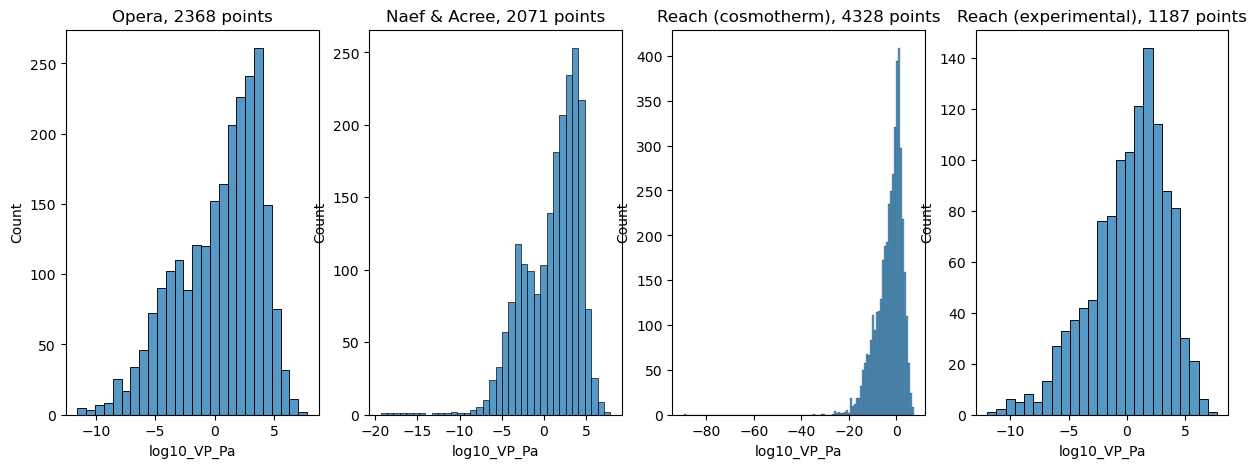

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
df_naef['log10_VP_Pa'] = df_naef['log10_VP_Pa'].apply(lambda x: float(x))
df_reach_curated_compact['log10_VP_Pa'] = df_reach_curated_compact['log10_VP_Pa'].apply(lambda x: float(x))
df_opera_curated_compact_298['log10_VP_Pa'] = df_opera_curated_compact_298['log10_VP_Pa'].apply(lambda x: float(x))
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
sns.histplot(df_opera_curated_compact_298['log10_VP_Pa'], ax=ax[0])
sns.histplot(df_naef['log10_VP_Pa'], ax=ax[1])
sns.histplot(df_reach_cosmo['log10_VP_Pa'], ax=ax[2])
sns.histplot(df_reach_curated_compact['log10_VP_Pa'], ax=ax[3])
ax[0].set_title(f'Opera, {len(df_opera_curated_compact_298)} points')
ax[1].set_title(f'Naef & Acree, {len(df_naef)} points')
ax[2].set_title(f'Reach (cosmotherm), {len(df_reach_cosmo)} points')
ax[3].set_title(f'Reach (experimental), {len(df_reach_curated_compact)} points')
plt.show()

/tmp/ipykernel_3491214/1451528793.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_duplicates['log10_VP_Pa'] = df_combined_duplicates['log10_VP_Pa'].astype(float)


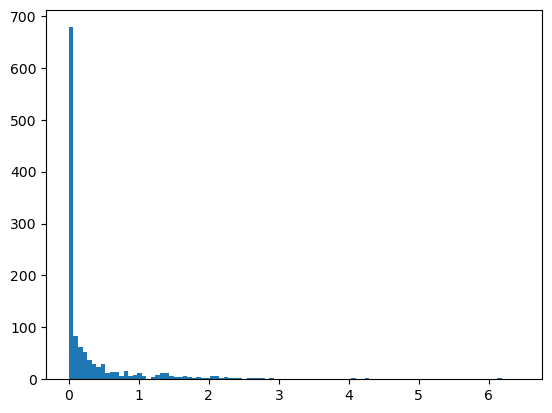

0.3422546634225466 diff smaller then 0.01
0.7347931873479319 diff smaller then 0.3
0.8726682887266829 diff smaller then 1.0


In [73]:
#make df with duplicates in inchikey
df_combined_duplicates = df_combined[df_combined.duplicated(subset=['inchikey'], keep=False)]
#log10_VP_Pa as float
df_combined_duplicates['log10_VP_Pa'] = df_combined_duplicates['log10_VP_Pa'].astype(float)
df_combined_duplicates
#iterate over duplicates, make a list with difference between max and min value of log10_VP_Pa
duplicates = df_combined_duplicates['inchikey'].unique()
duplicates
duplicates_log10_VP_Pa_diffs = []
for duplicate in duplicates:
    df_duplicate = df_combined_duplicates[df_combined_duplicates['inchikey'] == duplicate]
    duplicates_log10_VP_Pa_diffs.append(max(df_duplicate['log10_VP_Pa']) - min(df_duplicate['log10_VP_Pa']))
#plot in histogram
import matplotlib.pyplot as plt
plt.hist(duplicates_log10_VP_Pa_diffs,bins='auto')
plt.show()
#print out: percentage within <0.01, <0.3 and <1.0 
print(len([x for x in duplicates_log10_VP_Pa_diffs if x < 0.01])/len(duplicates_log10_VP_Pa_diffs),'diff smaller then 0.01')
print(len([x for x in duplicates_log10_VP_Pa_diffs if x < 0.3])/len(duplicates_log10_VP_Pa_diffs),'diff smaller then 0.3')
print(len([x for x in duplicates_log10_VP_Pa_diffs if x < 1.0])/len(duplicates_log10_VP_Pa_diffs),'diff smaller then 1.0')

In [2]:
import pandas as pd

In [3]:
df_25 = pd.read_csv('../tmp_data/df_25_opera_standardized.csv')
df_25

SMILES  VP log mmHg  VP logPa  \
0                              CC(O)C(=O)O    -1.089900  1.035002   
1                 O=C(O)c1c(Cl)ccc(Cl)c1Cl    -3.259600 -1.134698   
2         c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34    -8.260400 -6.135498   
3     COC(=O)C1C(OC(=O)c2ccccc2)CC2CCC1N2C    -6.719001 -4.594099   
4                     O=C(O)c1cccc(Cl)c1Cl    -3.642099 -1.517198   
...                                    ...          ...       ...   
2363                       FCC(F)(F)OC(F)F     2.568201  4.693102   
2364     Clc1cc2c(oc3c(Cl)cccc32)c(Cl)c1Cl    -7.400099 -5.275198   
2365             OCCOc1ccc(N=Nc2ccccc2)cc1    -7.674899 -5.549997   
2366              Brc1ccc2c(c1)Oc1ccccc1O2    -4.522900 -2.397999   
2367                Brc1cccc2c1Oc1ccccc1O2    -4.580000 -2.455098   

                       standardized_smiles                     inchikey  
0                              CC(O)C(=O)O  JVTAAEKCZFNVCJ-UHFFFAOYSA-N  
1                 O=C(O)c1c(Cl)ccc(Cl)c1Cl  XZIDTOHMJBOSOX-UHFFFAOYSA-N  
2         c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34  FMMWHPNWAFZXNH-UHFFFAOYSA-N  
3     COC(=O)C1C(OC(=O)c2ccccc2)CC2CCC1N2C  ZPUCINDJVBIVPJ-UHFFFAOYSA-N  
4                     O=C(O)c1cccc(Cl)c1Cl  QAOJBHRZQQDFHA-UHFFFAOYSA-N  
...                                    ...                          ...  
2363                       FCC(F)(F)OC(F)F  MFNUKMQUVGMCEW-UHFFFAOYSA-N  
2364     Clc1cc2c(oc3c(Cl)cccc32)c(Cl)c1Cl  JNVHSHPAAMRSKK-UHFFFAOYSA-N  
2365             OCCOc1ccc(N=Nc2ccccc2)cc1  WFNPQMPOEDMXFS-UHFFFAOYSA-N  
2366              Brc1ccc2c(c1)Oc1ccccc1O2  GSUCEGNAROQSGU-UHFFFAOYSA-N  
2367                Brc1cccc2c1Oc1ccccc1O2  HEAUGIUDKRRLPJ-UHFFFAOYSA-N  

[2368 rows x 5 columns]

In [14]:
df_opera_298K = pd.read_csv('../tmp_data/df_25_opera_standardized.csv')
df_naef_298K = pd.read_csv('NAEF_features_compact_298K.csv')
df_reach_experimental = pd.read_csv('REACH_semi_curated_features_compact_298K.csv')
df_reach_standardized_uncurated = pd.read_csv('/localhome/cschiebroek/MDFPs/mdfptools/carl/data_curation/tmp_data/REACH_standardized_not_cleaned.csv')
df_reach_standardized_uncurated

#name        cas  \
0             Ô_-alanine   107-95-9   
1             Ô_-alanine   107-95-9   
2       Ô_-butyrolactone    96-48-0   
3       Ô_-butyrolactone    96-48-0   
4       Ô_-butyrolactone    96-48-0   
...                  ...        ...   
4532       vinyl laurate  2146-71-6   
4533       vinyl laurate  2146-71-6   
4534  vinylene carbonate   872-36-6   
4535            warfarin    81-81-2   
4536              xylose    58-86-6   

                                           iupacName  P (upperQualifier)  \
0                              3-Aminopropionic acid                 NaN   
1                              3-Aminopropionic acid                 NaN   
2                                       oxolan-2-one                 NaN   
3                                       oxolan-2-one                 NaN   
4                                       oxolan-2-one                 NaN   
...                                              ...                 ...   
4532                                   Vinyl laurate                 NaN   
4533                                   Vinyl laurate                 NaN   
4534                                1,3-dioxol-2-one                 NaN   
4535  (RS)-4-hydroxy-3-(3-oxo-1-phenylbutyl)coumarin                 NaN   
4536             (2S,3R,4S; 5R)-oxane-2,3,4,5-tetrol                 NaN   

      P (upperValue)  P (lowerQualifier)  P (lowerValue) P (unit)  \
0                NaN                 NaN    5.060000e-08    mm Hg   
1                NaN                 NaN    6.740000e-06       Pa   
2                NaN                 NaN    3.440000e-01      hPa   
3                NaN                 NaN    4.000000e-01      hPa   
4                NaN                 NaN    9.000000e-01      hPa   
...              ...                 ...             ...      ...   
4532             NaN                 NaN    2.800000e-01       Pa   
4533             NaN                 NaN    7.110000e-01       Pa   
4534             NaN                 NaN    3.350000e+02       Pa   
4535             NaN                 NaN    3.470000e-03       Pa   
4536             NaN                 NaN    4.900000e-05       Pa   

      T (upperQualifier)  T (upperValue)  T (lowerQualifier)  T (lowerValue)  \
0                    NaN             NaN                 NaN            25.0   
1                    NaN             NaN                 NaN            25.0   
2                    NaN             NaN                 NaN            20.0   
3                    NaN             NaN                 NaN            20.0   
4                    NaN             NaN                 NaN            20.0   
...                  ...             ...                 ...             ...   
4532                 NaN             NaN                 NaN            25.0   
4533                 NaN             NaN                 NaN            25.0   
4534                 NaN             NaN                 NaN            25.0   
4535                 NaN             NaN                 NaN            20.0   
4536                 NaN             NaN                 NaN            25.0   

     T (unit)       VP_Pa  Temperature_K  \
0           C    0.000007         298.15   
1           C    0.000007         298.15   
2           C   34.400000         293.15   
3           C   40.000000         293.15   
4           C   90.000000         293.15   
...       ...         ...            ...   
4532        C    0.280000         298.15   
4533        C    0.711000         298.15   
4534        C  335.000000         298.15   
4535        C    0.003470         293.15   
4536        C    0.000049         298.15   

                                      SMILES  \
0                                  NCCC(O)=O   
1                                  NCCC(O)=O   
2                                  O=C1CCCO1   
3                                  O=C1CCCO1   
4                                  O=C1CCCO1   
...                           

In [15]:
#compact dfs: only have standardized_smiles, log10_VP_Pa and inchikey. needs to have same naming over dfs.
df_opera_298K = df_opera_298K[["standardized_smiles", "VP logPa", "inchikey"]]
df_opera_298K = df_opera_298K.rename(columns={'VP logPa':'log10_VP_Pa'})
df_opera_298K['source'] = 'OPERA'
df_opera_298K.to_csv('../tmp_data/df_opera_298K_compact.csv', index=False)
df_opera_298K

standardized_smiles  log10_VP_Pa  \
0                              CC(O)C(=O)O     1.035002   
1                 O=C(O)c1c(Cl)ccc(Cl)c1Cl    -1.134698   
2         c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34    -6.135498   
3     COC(=O)C1C(OC(=O)c2ccccc2)CC2CCC1N2C    -4.594099   
4                     O=C(O)c1cccc(Cl)c1Cl    -1.517198   
...                                    ...          ...   
2363                       FCC(F)(F)OC(F)F     4.693102   
2364     Clc1cc2c(oc3c(Cl)cccc32)c(Cl)c1Cl    -5.275198   
2365             OCCOc1ccc(N=Nc2ccccc2)cc1    -5.549997   
2366              Brc1ccc2c(c1)Oc1ccccc1O2    -2.397999   
2367                Brc1cccc2c1Oc1ccccc1O2    -2.455098   

                         inchikey source  
0     JVTAAEKCZFNVCJ-UHFFFAOYSA-N  OPERA  
1     XZIDTOHMJBOSOX-UHFFFAOYSA-N  OPERA  
2     FMMWHPNWAFZXNH-UHFFFAOYSA-N  OPERA  
3     ZPUCINDJVBIVPJ-UHFFFAOYSA-N  OPERA  
4     QAOJBHRZQQDFHA-UHFFFAOYSA-N  OPERA  
...                           ...    ...  
2363  MFNUKMQUVGMCEW-UHFFFAOYSA-N  OPERA  
2364  JNVHSHPAAMRSKK-UHFFFAOYSA-N  OPERA  
2365  WFNPQMPOEDMXFS-UHFFFAOYSA-N  OPERA  
2366  GSUCEGNAROQSGU-UHFFFAOYSA-N  OPERA  
2367  HEAUGIUDKRRLPJ-UHFFFAOYSA-N  OPERA  

[2368 rows x 4 columns]

In [16]:
df_naef_298K = df_naef_298K[["standardized_smiles", "log10_VP_Pa", "inchikey"]]
df_naef_298K['source'] = 'Naef_Acree'
df_naef_298K.to_csv('../tmp_data/df_naef_298K_compact.csv', index=False)
df_naef_298K

standardized_smiles  log10_VP_Pa  \
0     CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...      -19.360   
1     CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...      -18.533   
2     CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...      -17.707   
3     CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...      -16.839   
4      CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC      -15.970   
...                                                 ...          ...   
2066                                                 CF        6.582   
2067                                                C#C        6.591   
2068                                             FC(F)F        6.672   
2069                                                  C        7.790   
2070                                          FC(F)(F)F        7.910   

                         inchikey      source  
0     FIUOBKZPFQPHFG-UHFFFAOYSA-N  Naef_Acree  
1     OPRWEYHEIDHWGM-UHFFFAOYSA-N  Naef_Acree  
2     HAIPLQZWDQVPPR-UHFFFAOYSA-N  Naef_Acree  
3     PFLUOWJPZLHUEA-UHFFFAOYSA-N  Naef_Acree  
4     CFBPOLLJQOANPF-UHFFFAOYSA-N  Naef_Acree  
...                           ...         ...  
2066  NBVXSUQYWXRMNV-UHFFFAOYSA-N  Naef_Acree  
2067  HSFWRNGVRCDJHI-UHFFFAOYSA-N  Naef_Acree  
2068  XPDWGBQVDMORPB-UHFFFAOYSA-N  Naef_Acree  
2069  VNWKTOKETHGBQD-UHFFFAOYSA-N  Naef_Acree  
2070  TXEYQDLBPFQVAA-UHFFFAOYSA-N  Naef_Acree  

[2071 rows x 4 columns]

In [21]:
from rdkit import Chem
df_reach_standardized_uncurated_298K = df_reach_standardized_uncurated[df_reach_standardized_uncurated['Temperature_K'] == 298.15]
df_reach_standardized_uncurated_298K['inchikey'] = df_reach_standardized_uncurated_298K.apply(lambda row: Chem.MolToInchiKey(Chem.MolFromSmiles(row['standardized_smiles'])), axis=1)
df_reach_standardized_uncurated_298K
df_reach_compact = df_reach_experimental[["standardized_smiles", "log10_VP_Pa", "inchikey"]]
df_reach_compact['source'] = 'REACH'
df_reach_compact.to_csv('../tmp_data/df_reach_298K_compact.csv', index=False)
df_reach_compact

/tmp/ipykernel_9554/1974848210.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reach_standardized_uncurated_298K['inchikey'] = df_reach_standardized_uncurated_298K.apply(lambda row: Chem.MolToInchiKey(Chem.MolFromSmiles(row['standardized_smiles'])), axis=1)
/tmp/ipykernel_9554/1974848210.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reach_compact['source'] = 'REACH'


standardized_smiles  log10_VP_Pa  \
0                           O=S(=O)([O-])CCC[n+]1ccccc1    -4.372634   
1                           O=S(=O)([O-])CCC[n+]1ccccc1    -2.617983   
2                           O=S(=O)([O-])CCC[n+]1ccccc1    -4.841638   
3     CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...   -10.387216   
4                      O=C(CCCCC(=O)N(CCO)CCO)N(CCO)CCO    -2.744727   
...                                                 ...          ...   
1182                                                FCF     6.230704   
1183                                                C#C     5.843183   
1184                                               C=CF     6.232996   
1185                                             FC(F)F     6.672597   
1186                                            C=C(F)F     6.602060   

                         inchikey source  
0     REEBJQTUIJTGAL-UHFFFAOYSA-N  REACH  
1     REEBJQTUIJTGAL-UHFFFAOYSA-N  REACH  
2     REEBJQTUIJTGAL-UHFFFAOYSA-N  REACH  
3     MLDQJTXFUGDVEO-UHFFFAOYSA-N  REACH  
4     OKRNLSUTBJUVKA-UHFFFAOYSA-N  REACH  
...                           ...    ...  
1182  RWRIWBAIICGTTQ-UHFFFAOYSA-N  REACH  
1183  HSFWRNGVRCDJHI-UHFFFAOYSA-N  REACH  
1184  XUCNUKMRBVNAPB-UHFFFAOYSA-N  REACH  
1185  XPDWGBQVDMORPB-UHFFFAOYSA-N  REACH  
1186  BQCIDUSAKPWEOX-UHFFFAOYSA-N  REACH  

[1187 rows x 4 columns]

In [35]:
#now combine and save combine df
df_combined = pd.concat([df_opera_298K, df_naef_298K, df_reach_compact])
df_combined.to_csv('../tmp_data/df_combined_298K_compact.csv', index=False)
df_combined

standardized_smiles  log10_VP_Pa  \
0                              CC(O)C(=O)O     1.035002   
1                 O=C(O)c1c(Cl)ccc(Cl)c1Cl    -1.134698   
2         c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34    -6.135498   
3     COC(=O)C1C(OC(=O)c2ccccc2)CC2CCC1N2C    -4.594099   
4                     O=C(O)c1cccc(Cl)c1Cl    -1.517198   
...                                    ...          ...   
1182                                   FCF     6.230704   
1183                                   C#C     5.843183   
1184                                  C=CF     6.232996   
1185                                FC(F)F     6.672597   
1186                               C=C(F)F     6.602060   

                         inchikey source  
0     JVTAAEKCZFNVCJ-UHFFFAOYSA-N  OPERA  
1     XZIDTOHMJBOSOX-UHFFFAOYSA-N  OPERA  
2     FMMWHPNWAFZXNH-UHFFFAOYSA-N  OPERA  
3     ZPUCINDJVBIVPJ-UHFFFAOYSA-N  OPERA  
4     QAOJBHRZQQDFHA-UHFFFAOYSA-N  OPERA  
...                           ...    ...  
1182  RWRIWBAIICGTTQ-UHFFFAOYSA-N  REACH  
1183  HSFWRNGVRCDJHI-UHFFFAOYSA-N  REACH  
1184  XUCNUKMRBVNAPB-UHFFFAOYSA-N  REACH  
1185  XPDWGBQVDMORPB-UHFFFAOYSA-N  REACH  
1186  BQCIDUSAKPWEOX-UHFFFAOYSA-N  REACH  

[5626 rows x 4 columns]

In [29]:
#wait, lets try something. can we match from COSMO-therm to experimental via the df? lets get the DF filtered for experimental values and somehow match (on inchikey?) to the unclean but standardized df
from rdkit.Chem import Descriptors
def getMolDescriptors(mol, missingVal=None):
    ''' calculate the full list of descriptors for a molecule
    
        missingVal is used if the descriptor cannot be calculated
    '''
    res = {}
    for nm,fn in Descriptors._descList:
        # some of the descriptor fucntions can throw errors if they fail, catch those here:
        try:
            val = fn(mol)
        except:
            # print the error message:
            import traceback
            traceback.print_exc()
            # and set the descriptor value to whatever missingVal is
            val = missingVal
        res[nm] = val
    #add inchikey
    res['inchikey'] = Chem.MolToInchiKey(mol)
    return res

mols = [Chem.MolFromSmiles(smi) for smi in df_combined['standardized_smiles']]
descriptors = [getMolDescriptors(m) for m in mols]
#make descriptor df
descriptor_df = pd.DataFrame(descriptors)

[15:24:59] unrecognized chirality tag (8) on atom 6 is ignored.
[15:24:59] unrecognized chirality tag (8) on atom 17 is ignored.
[15:25:00] unrecognized chirality tag (8) on atom 4 is ignored.
[15:25:00] unrecognized chirality tag (8) on atom 11 is ignored.
[15:25:00] unrecognized chirality tag (8) on atom 1 is ignored.
[15:25:00] unrecognized chirality tag (8) on atom 7 is ignored.
[15:25:00] unrecognized chirality tag (8) on atom 13 is ignored.
[15:25:00] unrecognized chirality tag (8) on atom 3 is ignored.
[15:25:00] unrecognized chirality tag (8) on atom 11 is ignored.
[15:25:00] unrecognized chirality tag (8) on atom 9 is ignored.
[15:25:01] unrecognized chirality tag (8) on atom 6 is ignored.
[15:25:01] unrecognized chirality tag (8) on atom 5 is ignored.
[15:25:01] unrecognized chirality tag (8) on atom 6 is ignored.


standardized_smiles  log10_VP_Pa  \
0                           CC(O)C(=O)O     1.035002   
1              O=C(O)c1c(Cl)ccc(Cl)c1Cl    -1.134698   
2      c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34    -6.135498   
3      c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34    -6.135498   
4      c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34    -6.135000   
...                                 ...          ...   
11877                   C=C(Br)C(F)(F)F     4.913814   
11878                             C=COC     5.295347   
11879                             C=COC     5.295347   
11880                             C=COC     5.244030   
11881                             C=COC     5.244030   

                          inchikey      source  MaxAbsEStateIndex  \
0      JVTAAEKCZFNVCJ-UHFFFAOYSA-N       OPERA           9.449074   
1      XZIDTOHMJBOSOX-UHFFFAOYSA-N       OPERA          10.567284   
2      FMMWHPNWAFZXNH-UHFFFAOYSA-N       OPERA           2.309074   
3      FMMWHPNWAFZXNH-UHFFFAOYSA-N       OPERA           2.309074   
4      FMMWHPNWAFZXNH-UHFFFAOYSA-N  Naef_Acree           2.309074   
...                            ...         ...                ...   
11877  QKBKGNDTLQFSEU-UHFFFAOYSA-N       REACH          11.031829   
11878  XJRBAMWJDBPFIM-UHFFFAOYSA-N       REACH           4.305556   
11879  XJRBAMWJDBPFIM-UHFFFAOYSA-N       REACH           4.305556   
11880  XJRBAMWJDBPFIM-UHFFFAOYSA-N       REACH           4.305556   
11881  XJRBAMWJDBPFIM-UHFFFAOYSA-N       REACH           4.305556   

       MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex       qed    MolWt  \
0            9.449074           1.185185       -1.231481  0.453936   90.078   
1           10.567284           0.030864       -1.187500  0.744344  225.458   
2            2.309074           1.317945        1.317945  0.243454  252.316   
3            2.309074           1.317945        1.317945  0.243454  252.316   
4            2.309074           1.317945        1.317945  0.243454  252.316   
...               ...                ...             ...       ...      ...   
11877       11.031829           0.944444       -4.277778  0.529850  174.947   
11878        4.305556           1.375000        1.375000  0.404628   58.080   
11879        4.305556           1.375000        1.375000  0.404628   58.080   
11880        4.305556           1.375000        1.375000  0.404628   58.080   
11881        4.305556           1.375000        1.375000  0.404628   58.080   

       ...  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  \
0      ...           0             0           0                  0   
1      ...           0             0           0                  0   
2      ...           0             0           0                  0   
3      ...           0             0           0                  0   
4      ...           0             0           0                  0   
...    ...         ...           ...         ...                ...   
11877  ...           0             0           0                  0   
11878  ...           0             0           0                  0   
11879  ...           0             0           0                  0   
11880  ...           0             0           0                  0   
11881  ...           0             0           0                  0   

       fr_tetrazole  fr_thiazole  fr_thiocyan  fr_thiophene  fr_unbrch_alkane  \
0                 0            0            0             0                 0   
1                 0            0            0             0                 0   
2                 0            0            0             0                 0   
3                 0            0            0             0                 0   
4                 0            0            0             0                 0   
...             ...          ...          ...           ...               ...   
11877             0            0            0             0                 0   
11878             0            0            0             0         

In [37]:
df_combined = pd.read_csv('../tmp_data/df_combined_298K_compact.csv')
#merge on inchikey
df_combined_descritptors = df_combined.merge(descriptor_df, on='inchikey')
df_combined_descritptors
#drop duplicates over all columns
df_combined_descritptors = df_combined_descritptors.drop_duplicates()
df_combined_descritptors

standardized_smiles  log10_VP_Pa  \
0                               CC(O)C(=O)O     1.035002   
1                  O=C(O)c1c(Cl)ccc(Cl)c1Cl    -1.134698   
2          c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34    -6.135498   
4          c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34    -6.135000   
6      COC(=O)C1C(OC(=O)c2ccccc2)CC2CCC1N2C    -4.594099   
...                                     ...          ...   
11863                            CC(C)(C)Cl     4.612040   
11870                            CC(C)(C)Cl     4.602023   
11877                       C=C(Br)C(F)(F)F     4.913814   
11878                                 C=COC     5.295347   
11880                                 C=COC     5.244030   

                          inchikey      source  MaxAbsEStateIndex  \
0      JVTAAEKCZFNVCJ-UHFFFAOYSA-N       OPERA           9.449074   
1      XZIDTOHMJBOSOX-UHFFFAOYSA-N       OPERA          10.567284   
2      FMMWHPNWAFZXNH-UHFFFAOYSA-N       OPERA           2.309074   
4      FMMWHPNWAFZXNH-UHFFFAOYSA-N  Naef_Acree           2.309074   
6      ZPUCINDJVBIVPJ-UHFFFAOYSA-N       OPERA          12.296709   
...                            ...         ...                ...   
11863  NBRKLOOSMBRFMH-UHFFFAOYSA-N       REACH           5.530093   
11870  NBRKLOOSMBRFMH-UHFFFAOYSA-N       REACH           5.530093   
11877  QKBKGNDTLQFSEU-UHFFFAOYSA-N       REACH          11.031829   
11878  XJRBAMWJDBPFIM-UHFFFAOYSA-N       REACH           4.305556   
11880  XJRBAMWJDBPFIM-UHFFFAOYSA-N       REACH           4.305556   

       MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex       qed    MolWt  \
0            9.449074           1.185185       -1.231481  0.453936   90.078   
1           10.567284           0.030864       -1.187500  0.744344  225.458   
2            2.309074           1.317945        1.317945  0.243454  252.316   
4            2.309074           1.317945        1.317945  0.243454  252.316   
6           12.296709           0.097012       -0.408467  0.797936  303.358   
...               ...                ...             ...       ...      ...   
11863        5.530093           0.027778       -0.027778  0.401280   92.569   
11870        5.530093           0.027778       -0.027778  0.401280   92.569   
11877       11.031829           0.944444       -4.277778  0.529850  174.947   
11878        4.305556           1.375000        1.375000  0.404628   58.080   
11880        4.305556           1.375000        1.375000  0.404628   58.080   

       ...  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  \
0      ...           0             0           0                  0   
1      ...           0             0           0                  0   
2      ...           0             0           0                  0   
4      ...           0             0           0                  0   
6      ...           0             0           0                  0   
...    ...         ...           ...         ...                ...   
11863  ...           0             0           0                  0   
11870  ...           0             0           0                  0   
11877  ...           0             0           0                  0   
11878  ...           0             0           0                  0   
11880  ...           0             0           0                  0   

       fr_tetrazole  fr_thiazole  fr_thiocyan  fr_thiophene  fr_unbrch_alkane  \
0                 0            0            0             0                 0   
1                 0            0            0             0                 0   
2                 0            0            0             0                 0   
4                 0            0            0             0                 0   
6                 0            0            0             0                 0   
...             ...          ...          ...           ...               ...   
11863             0            0            0             0                 0   
11870             0     

In [38]:
df_combined_descritptors.sort_values(by=['inchikey'])

standardized_smiles  log10_VP_Pa  \
6378                       c1ccc(C(c2ccccc2)c2ccccc2)cc1    -3.128498   
8699                          CSc1nc(NC(C)C)nc(NC(C)C)n1    -3.770000   
8697                          CSc1nc(NC(C)C)nc(NC(C)C)n1    -3.781698   
9461   CC(C)(c1ccccc1)c1ccc(OP(=O)(Oc2ccccc2)Oc2ccccc...    -8.763000   
8097                                   OC1CCCCC1c1ccccc1     0.689602   
...                                                  ...          ...   
7539                        CCCCCCCCCCCCCCCCCCCCCCCCCCCC    -6.497000   
7288                                            COCC(C)C     4.449203   
7290                                            COCC(C)C     4.440000   
9813                         COc1c(O)c(OC)c(Cl)c(Cl)c1Cl    -1.114000   
10051                                      CCCCCOC(=O)CO     1.161000   

                          inchikey      source  MaxAbsEStateIndex  \
6378   AAAQKTZKLRYKHR-UHFFFAOYSA-N       OPERA           2.199074   
8699   AAEVYOVXGOFMJO-UHFFFAOYSA-N  Naef_Acree           4.303889   
8697   AAEVYOVXGOFMJO-UHFFFAOYSA-N       OPERA           4.303889   
9461   AAHYHBHESZMGBO-UHFFFAOYSA-N  Naef_Acree          13.558047   
8097   AAIBYZBZXNWTPP-UHFFFAOYSA-N       OPERA           9.822373   
...                            ...         ...                ...   
7539   ZYURHZPYMFLWSH-UHFFFAOYSA-N  Naef_Acree           2.304287   
7288   ZYVYEJXMYBUCMN-UHFFFAOYSA-N       OPERA           4.803241   
7290   ZYVYEJXMYBUCMN-UHFFFAOYSA-N  Naef_Acree           4.803241   
9813   ZZCSBXFJFLSDRR-UHFFFAOYSA-N  Naef_Acree           9.597377   
10051  ZZRQJJJPUWSDBN-UHFFFAOYSA-N  Naef_Acree          10.302731   

       MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex       qed    MolWt  \
6378         2.199074           0.308889        0.308889  0.576695  244.337   
8699         4.303889           0.309265        0.309265  0.770836  241.364   
8697         4.303889           0.309265        0.309265  0.770836  241.364   
9461        13.558047           0.189917       -3.998891  0.261793  444.467   
8097         9.822373           0.114676       -0.114676  0.697179  176.259   
...               ...                ...             ...       ...      ...   
7539         2.304287           1.374314        1.374314  0.134973  394.772   
7288         4.803241           0.675926        0.675926  0.493897   88.150   
7290         4.803241           0.675926        0.675926  0.493897   88.150   
9813         9.597377           0.039738       -0.269074  0.825682  257.500   
10051       10.302731           0.437731       -0.531386  0.458737  146.186   

       ...  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  \
6378   ...           0             0           0                  0   
8699   ...           1             0           0                  0   
8697   ...           1             0           0                  0   
9461   ...           0             0           0                  0   
8097   ...           0             0           0                  0   
...    ...         ...           ...         ...                ...   
7539   ...           0             0           0                  0   
7288   ...           0             0           0                  0   
7290   ...           0             0           0                  0   
9813   ...           0             0           0                  0   
10051  ...           0             0           0                  0   

       fr_tetrazole  fr_thiazole  fr_thiocyan  fr_thiophene  fr_unbrch_alkane  \
6378              0            0            0             0                 0   
8699              0            0            0             0                 0   
8697              0            0            0             0                 0   
9461              0            0            0             0                 0   
8097              0            0            0             0                 0   
...             ...          ...          .

In [26]:
df_combined_descritptors.to_csv('../tmp_data/df_combined_298K_descriptors.csv', index=False)